In [1]:
# importação das bibliotecas

import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from scipy.stats import randint, uniform
from collections import Counter
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
%matplotlib inline

In [2]:
# Carrega os dados dos heróis a partir de um arquivo CSV
herois = pd.read_csv('C:/Dados/Alelo/heroes_information.csv')

# Carrega os dados dos poderes dos heróis a partir de um arquivo CSV
poderes = pd.read_csv('C:/Dados/Alelo/super_hero_powers.csv')

# Remove a coluna 'hero_names' do DataFrame 'poderes', criando um novo DataFrame 'poderes2'
# Isso é feito porque 'hero_names' não é relevante para o agrupamento.
poderes2 = poderes.drop(columns=['hero_names'])

# Questão 1 e 2 - Análise de Cluster

In [ ]:
cost = []

# Define um intervalo de valores para 'K' (número de clusters) de 1 a 15.
K = range(1,16)
for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 10, verbose=0, random_state=42)
    result=kmode.fit_predict(poderes2)
    cost.append(kmode.cost_)
    if k > 1:  # A silhueta só pode ser calculada para k >= 2
        # Calcula a medida de silhueta para avaliar a qualidade do agrupamento.
        # A medida de silhueta varia de -1 a 1, onde valores próximos de 1 indicam que as amostras estão bem agrupadas.
        silhouette_avg = silhouette_score(poderes2, result)
        print(f"k={k}, Medida de silhueta: {silhouette_avg:.4f}")

In [ ]:
# plt.plot(K, cost, 'x-')
# Cria um gráfico de linha onde:
#   - K é o eixo x (número de clusters).
#   - cost é o eixo y (o custo ou distorção do modelo K-Modes).
#   - 'x-' especifica o estilo do gráfico: 'x' marca os pontos de dados e '-' conecta os pontos com linhas.

plt.plot(K, cost, 'x-')
plt.xlabel('No. de clusters')
plt.ylabel('Cost')
plt.title('Gráfuco de Cotovelo')
plt.show()

In [3]:
# O gráfico de cotovelo não deixa evidente qual o número de cluster seria ideal (talvez 6 ou 7). Pala análise
# da medida silhueta, a escolha fica em 6 (k=2 tem uma silhueta maior mas só dois grupos não é muito interessante!)
kmode = KModes(n_clusters=6, init = "random", n_init = 10, verbose=1, random_state=42)
clusters = kmode.fit_predict(poderes2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 218, cost: 4639.0
Run 1, iteration: 2/100, moves: 12, cost: 4639.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 229, cost: 4652.0
Run 2, iteration: 2/100, moves: 41, cost: 4652.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 218, cost: 4604.0
Run 3, iteration: 2/100, moves: 82, cost: 4587.0
Run 3, iteration: 3/100, moves: 17, cost: 4587.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 129, cost: 4524.0
Run 4, iteration: 2/100, moves: 9, cost: 4517.0
Run 4, iteration: 3/100, moves: 1, cost: 4517.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 312, cost: 4703.0
Run 5, iteration: 2/100, moves: 131, cost: 4658.0
Run 5, i

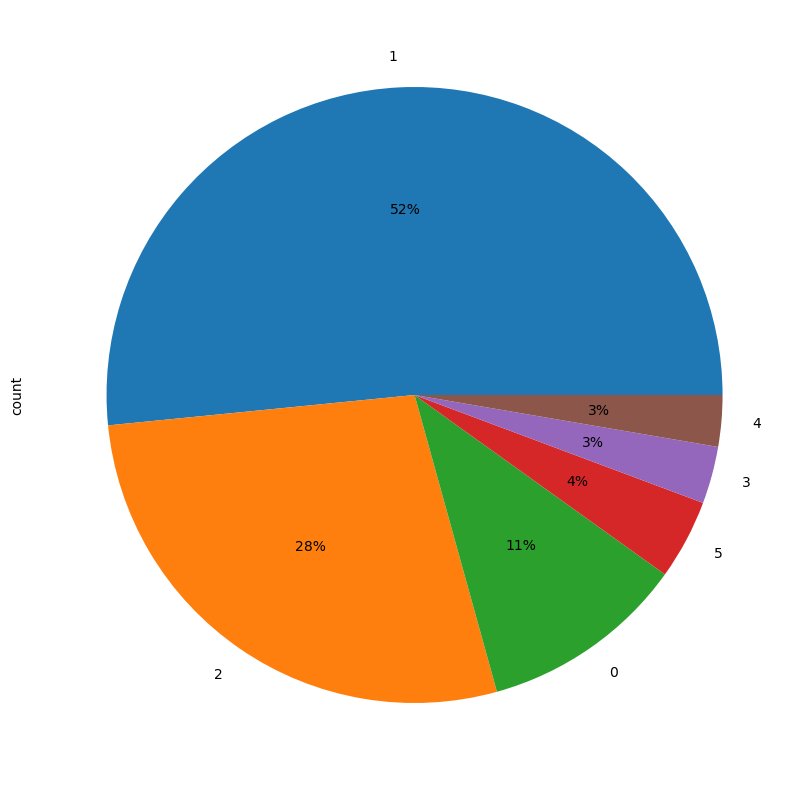

In [4]:
# Cria uma nova coluna chamada 'grupo' no DataFrame 'poderes' e atribui os rótulos dos clusters armazenados na variável 'clusters'.
# Isso associa cada herói ao seu respectivo grupo (cluster) com base nos resultados do K-Modes.
poderes['grupo'] = clusters

# poderes['grupo'].value_counts().plot.pie(figsize=(10, 10), autopct='%1.f%%')
# Calcula a contagem de ocorrências de cada grupo (cluster) na coluna 'grupo' e gera um gráfico de pizza.
poderes['grupo'].value_counts().plot.pie(figsize=(10,10),autopct='%1.f%%')
plt.show()

In [5]:
# for i in range(poderes['grupo'].nunique()):
# Inicia um loop que itera sobre cada cluster único presente na coluna 'grupo' do DataFrame 'poderes'.
# 'poderes['grupo'].nunique()' retorna o número de clusters únicos.

for i in range(poderes['grupo'].nunique()):
    print("Cluster no: {}".format(i))

    # Cria um novo DataFrame 'group_members' contendo apenas os heróis pertencentes ao cluster 'i'.
    group_members= poderes[poderes['grupo']==i]
    group_members_count = len(group_members)
  
    print("Representantes: ", end=' ')

    # Define o número padrão de representantes a serem exibidos como 10.
    reprs_count=10
    if group_members_count < 10:
        reprs_count = group_members_count
        
    for j in range(reprs_count):
        print(group_members.iloc[j]['hero_names'], end='; ')
    print('')
    
    super_powers = poderes[poderes['grupo']==i].drop(['hero_names','grupo'],axis=1).sum().to_dict()
    super_powers = sorted(super_powers.items(), key=lambda x:x[1], reverse=True)
    
    print('Habilidades mais comum com percentual de ocorrência:')
    for super_power in super_powers[:10]:
        # Imprime o nome do poder e sua porcentagem de ocorrência no cluster.
        print(super_power[0] + ' --> ' + format((super_power[1]/group_members_count), '.0%'))
    print('##############################################################################')

Cluster no: 0
Representantes:  Abe Sapien; Adam Strange; Ant-Man II; Batgirl; Batman; Batman II; Batwoman V; Black Canary; Black Panther; Black Widow; 
Habilidades mais comum com percentual de ocorrência:
Stamina --> 92%
Stealth --> 90%
Weapons Master --> 86%
Agility --> 85%
Marksmanship --> 83%
Intelligence --> 58%
Reflexes --> 58%
Accelerated Healing --> 29%
Durability --> 28%
Super Strength --> 28%
##############################################################################
Cluster no: 1
Representantes:  Abin Sur; Abraxas; Absorbing Man; Adam Monroe; Agent Bob; Agent Zero; Air-Walker; Alan Scott; Alex Woolsly; Allan Quatermain; 
Habilidades mais comum com percentual de ocorrência:
Flight --> 28%
Super Strength --> 28%
Energy Blasts --> 20%
Intelligence --> 17%
Durability --> 16%
Telepathy --> 11%
Accelerated Healing --> 10%
Force Fields --> 10%
Super Speed --> 10%
Agility --> 10%
##############################################################################
Cluster no: 2
Represent

[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 667 samples in 0.000s...
[t-SNE] Computed neighbors for 667 samples in 0.272s...
[t-SNE] Computed conditional probabilities for sample 667 / 667
[t-SNE] Mean sigma: 0.326658
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.807747
[t-SNE] KL divergence after 1000 iterations: 0.986139


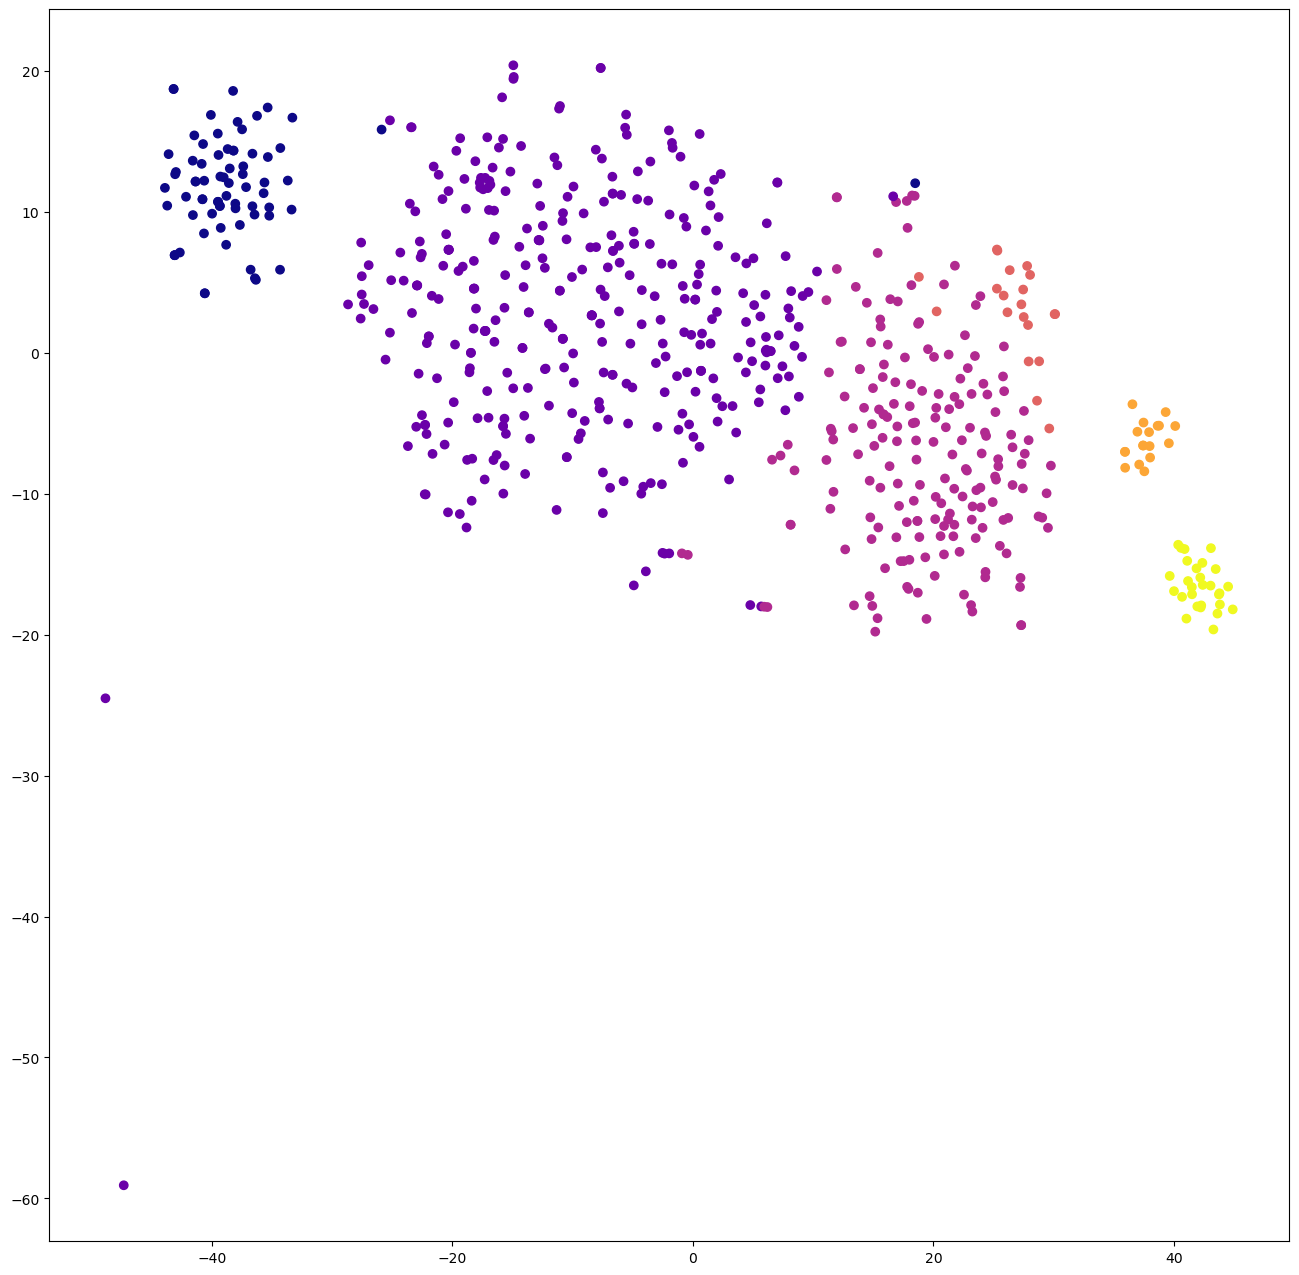

In [6]:

# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmode.labels_, cmap='plasma')
# Cria um gráfico de dispersão (scatter plot) onde:
#   - tsne_results[:, 0]: Coordenadas x das amostras no espaço reduzido.
#   - tsne_results[:, 1]: Coordenadas y das amostras no espaço reduzido.
#   - c=kmode.labels_: Cores dos pontos, definidas pelos rótulos dos clusters obtidos pelo K-Modes.
#   - cmap='plasma': Mapa de cores usado para colorir os pontos com base nos rótulos dos clusters.
np.random.seed(1)
tsne_clusters=TSNE(perplexity=27, verbose=1)
tsne_results=tsne_clusters.fit_transform(poderes.drop('hero_names', axis=1))
plt.figure(figsize=(16,16))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=kmode.labels_, cmap='plasma')
plt.show()

# Este código é útil para visualizar como os clusters gerados pelo K-Modes se distribuem em um espaço bidimensional,
# ajudando a entender a separação e a coesão dos grupos de heróis com base em seus poderes.


In [7]:
# cria o campo 'total_de_poderes' que indica quantos poderes o herói tem. Ela vai ser usada nos modelos preditivos 
# e também pode ser usada para analisar os grupos
poderes['total_de_poderes'] = poderes.select_dtypes(include=[bool]).sum(axis=1)

In [8]:
# Calcula a média do 'total_de_poderes' por grupo
media_poderes_por_grupo = poderes.groupby('grupo')['total_de_poderes'].mean()

# Exibe a média do 'total_de_poderes' por grupo
print("Média do total de poderes por grupo:")
print(media_poderes_por_grupo)

Média do total de poderes por grupo:
grupo
0    11.333333
1     4.726744
2    10.681081
3    28.550000
4    23.444444
5    16.535714
Name: total_de_poderes, dtype: float64


# Limpeza e preparação dos Dados

In [10]:
missing_values = herois.isnull().sum()

print(missing_values)

def analisar_dataframe(df):
    """
    Analisa cada coluna de um DataFrame, exibindo tabelas de frequência para colunas de objeto
    e estatísticas de resumo para colunas numéricas.

    Args:
        df (pd.DataFrame): O DataFrame a ser analisado.
    """

    for coluna in df.columns:
        print(f"Análise da coluna: {coluna}")

        if pd.api.types.is_object_dtype(df[coluna]):
            # Coluna de objeto (categórica)
            tabela_frequencia = df[coluna].value_counts()
            print("Tabela de Frequência:")
            print(tabela_frequencia)
        elif pd.api.types.is_numeric_dtype(df[coluna]):
            # Coluna numérica
            estatisticas = df[coluna].describe()
            print("Estatísticas de Resumo:")
            print(estatisticas)
        else:
            print(f"Coluna {coluna} não é numérica nem objeto.")

        print("-" * 40)  # Separador para melhor visualização


analisar_dataframe(herois)

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64
Análise da coluna: Unnamed: 0
Estatísticas de Resumo:
count    734.000000
mean     366.500000
std      212.031837
min        0.000000
25%      183.250000
50%      366.500000
75%      549.750000
max      733.000000
Name: Unnamed: 0, dtype: float64
----------------------------------------
Análise da coluna: name
Tabela de Frequência:
name
Goliath            3
Spider-Man         3
Vindicator         2
Blizzard           2
Speedy             2
                  ..
Fighting Spirit    1
Fin Fang Foom      1
Firebird           1
Firelord           1
Zoom               1
Name: count, Length: 715, dtype: int64
----------------------------------------
Análise da coluna: Gender
Tabela de Frequência:
Gender
Male      505
Female    200
-          29
Name: count, dtype: int64
---------------------------

In [11]:
# A análise das estatísticas descritivas mostra algumas limpezas que precisam ser feitas
# '-99' claramente significa valores ausente em 'Weight' e 'Height'. Vamos arrumar isso
herois['Weight']=herois['Weight'].replace(-99, np.nan)
herois['Height']=herois['Height'].replace(-99, np.nan)

# '-' deve significar ausente nos campos categóricos. Vamos arrumar isso também
herois.replace('-', np.nan,inplace=True)

In [12]:
herois.head()
# A saída abaixo mostra o df já corrigido

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN


### Nosso primeiro problema diz respeito a casos duplicados. No arquivo de informações dos heróis temos 19 heróis que aparecem em duas ou mais linhas. Três desses heróis (Angel, Atlas e Captain Marvel) aparecem em diferentes editoras ('Publisher') e portanto são personagens distintos. Como não temos como definir de qual editora veio o herói, o correto seria eliminar esses três casos da análise (não faremos aqui pois são poucos casos e não é um caso real). Para o restante dos heróis duplicados, nós escolhemos manter a linha com menos valores ausentes.


In [13]:
# Encontra os nomes repetidos
nomes_repetidos = herois[herois.duplicated(subset='name', keep=False)]

# Seleciona apenas as colunas 'name' e 'Publisher'
resultado = nomes_repetidos[['name', 'Publisher']]

# Exibe o resultado
print(resultado)

               name          Publisher
22            Angel      Marvel Comics
23            Angel  Dark Horse Comics
47            Atlas      Marvel Comics
48            Atlas          DC Comics
49             Atom          DC Comics
50             Atom          DC Comics
62          Batgirl          DC Comics
63          Batgirl          DC Comics
68           Batman          DC Comics
69           Batman          DC Comics
96     Black Canary          DC Comics
97     Black Canary          DC Comics
115        Blizzard      Marvel Comics
116        Blizzard      Marvel Comics
122     Blue Beetle          DC Comics
123     Blue Beetle          DC Comics
155  Captain Marvel      Marvel Comics
156  Captain Marvel          DC Comics
259       Firestorm          DC Comics
260       Firestorm          DC Comics
289         Goliath      Marvel Comics
290         Goliath      Marvel Comics
291         Goliath      Marvel Comics
481           Namor      Marvel Comics
482           Namor      

In [14]:
# Código para manter a linha com menos valores ausentes
def contar_ausentes(linha):
    return linha.isnull().sum()

# Adicionar uma coluna temporária com a contagem de valores ausentes
herois['ausentes'] = herois.apply(contar_ausentes, axis=1)

herois =herois.sort_values(by=['name', 'ausentes'])

# Remover duplicatas, mantendo a primeira ocorrência (que terá menos valores ausentes)
herois = herois.drop_duplicates(subset='name', keep='first')

# Remover a coluna temporária 'ausentes'
herois = herois.drop(columns=['ausentes'])

In [16]:
print(herois[herois['name'] == 'Batman']) #Agora só há um Batman!

    Unnamed: 0    name Gender Eye color   Race Hair color  Height  Publisher  \
68          68  Batman   Male      blue  Human      black   188.0  DC Comics   

   Skin color Alignment  Weight  
68        NaN      good    95.0  


In [17]:
herois.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  715 non-null    int64  
 1   name        715 non-null    object 
 2   Gender      687 non-null    object 
 3   Eye color   553 non-null    object 
 4   Race        419 non-null    object 
 5   Hair color  553 non-null    object 
 6   Height      509 non-null    float64
 7   Publisher   700 non-null    object 
 8   Skin color  72 non-null     object 
 9   Alignment   708 non-null    object 
 10  Weight      487 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 67.0+ KB


In [18]:
# Como o banco é pequeno, nós vamos tratar o ausente num campo categórico como uma nova categoria ('nesp' - não especificado)
herois = herois.apply(lambda col: col.fillna("nesp") if col.dtype == 'object' else col)

In [19]:
herois.info()
# Note como 'Skin color' quase não tem valores válidos. Não será usada na análise

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  715 non-null    int64  
 1   name        715 non-null    object 
 2   Gender      715 non-null    object 
 3   Eye color   715 non-null    object 
 4   Race        715 non-null    object 
 5   Hair color  715 non-null    object 
 6   Height      509 non-null    float64
 7   Publisher   715 non-null    object 
 8   Skin color  715 non-null    object 
 9   Alignment   715 non-null    object 
 10  Weight      487 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 67.0+ KB


In [20]:
# Outro prooblema identificado é o valor 'bown' para 'Eye color'. Vamos substituir para 'brown'
print(herois['Eye color'].value_counts())
herois = herois.replace('bown', 'brown')
print(herois['Eye color'].value_counts())

# Em 'Hair color' alguns valores estão com caixa alta e o mesmo valor aparece em caixa baixa (a primeira letra)
# vamos deixar tudo em minúsculo para corrigir isso
print(herois['Hair color'].value_counts())
herois['Hair color'] = herois['Hair color'].str.lower()
print(herois['Hair color'].value_counts())

Eye color
blue                       221
nesp                       162
brown                      123
green                       73
red                         45
black                       22
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
white / red                  1
yellow / blue                1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / red                 1
bown                         1
Name: count, dtype: int64
Eye color
blue                       221
nesp                       162
brown                      124
green                       73
red                         45
black                       22
yellow                      19
white                   

In [21]:

# Campos categóricos com muitas categorias deixam o modelo mais pesado e categorias raras podem atrapalhar o desempenho do modelo
# O código abaixo vai unir todas categorias com menos de 1% numa nova categoria chamada 'outros'

def recategorizar_menos_de_1_porcento(coluna):
    """
    Recategoriza uma coluna, agrupando categorias com menos de 1% dos dados em 'outros'.

    Parâmetros:
    coluna (pd.Series): A coluna a ser recategorizada.

    Retorna:
    pd.Series: A coluna recategorizada.
    """
    # Calcula a frequência de cada categoria
    frequencia = coluna.value_counts(normalize=True)
    
    # Identifica as categorias que representam menos de 1% dos dados
    categorias_menos_de_1 = frequencia[frequencia < 0.01].index
    
    # Substitui essas categorias por 'outros'
    coluna_recategorizada = coluna.apply(lambda x: 'outros' if x in categorias_menos_de_1 else x)
    
    return coluna_recategorizada

In [22]:
# Vamos recategorizar então. Não necessário com 'Skin color' pois não será mais usada

colunas = ['Gender', 'Eye color', 'Race', 'Hair color', 'Publisher']
for coluna in colunas:
    novo_nome = coluna + '_rec'  # Cria o nome do novo campo
    herois[novo_nome] = recategorizar_menos_de_1_porcento(herois[coluna])



In [23]:
# Como ficou, por exemplo, 'Eye color'
print(herois['Eye color_rec'].value_counts())

Eye color_rec
blue      221
nesp      162
brown     124
green      73
red        45
outros     32
black      22
yellow     19
white      17
Name: count, dtype: int64


In [24]:
herois.head()
# Como está nosso banco atual

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Gender_rec,Eye color_rec,Race_rec,Hair color_rec,Publisher_rec
0,0,A-Bomb,Male,yellow,Human,no hair,203.0,Marvel Comics,nesp,good,441.0,Male,yellow,Human,no hair,Marvel Comics
1,1,Abe Sapien,Male,blue,Icthyo Sapien,no hair,191.0,Dark Horse Comics,blue,good,65.0,Male,blue,outros,no hair,Dark Horse Comics
2,2,Abin Sur,Male,blue,Ungaran,no hair,185.0,DC Comics,red,good,90.0,Male,blue,outros,no hair,DC Comics
3,3,Abomination,Male,green,Human / Radiation,no hair,203.0,Marvel Comics,nesp,bad,441.0,Male,green,Human / Radiation,no hair,Marvel Comics
4,4,Abraxas,Male,blue,Cosmic Entity,black,NaN,Marvel Comics,nesp,bad,NaN,Male,blue,outros,black,Marvel Comics


In [25]:
herois.info() # Todos os ausentes foram tratados com exceção de 'Weight' e 'Height'

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 733
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      715 non-null    int64  
 1   name            715 non-null    object 
 2   Gender          715 non-null    object 
 3   Eye color       715 non-null    object 
 4   Race            715 non-null    object 
 5   Hair color      715 non-null    object 
 6   Height          509 non-null    float64
 7   Publisher       715 non-null    object 
 8   Skin color      715 non-null    object 
 9   Alignment       715 non-null    object 
 10  Weight          487 non-null    float64
 11  Gender_rec      715 non-null    object 
 12  Eye color_rec   715 non-null    object 
 13  Race_rec        715 non-null    object 
 14  Hair color_rec  715 non-null    object 
 15  Publisher_rec   715 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 95.0+ KB


In [26]:
# Vamos imputar os ausentes de peso e altura de maneira simples. Vamos substituir pela média de gênero e raça
# Se não houver a combinação de gênero e raça, substituímos pela média do gênero apenas

# Vou salvar o peso original para a criação do modelo preditivo específico, posteriormente
herois['Original_Weight'] = herois['Weight'] 
herois['Height'] = herois['Height'].fillna(herois.groupby(['Race_rec','Gender_rec'])['Height'].transform('mean'))
herois['Weight'] = herois['Weight'].fillna(herois.groupby(['Race_rec','Gender_rec'])['Weight'].transform('mean'))

herois['Height'] = herois['Height'].fillna(herois.groupby(['Gender_rec'])['Height'].transform('mean'))
herois['Weight'] = herois['Weight'].fillna(herois.groupby(['Gender_rec'])['Weight'].transform('mean'))

herois = herois.drop('Unnamed: 0', axis=1) # Já podia ter tirado antes :)

In [27]:
herois.info() # sem valores ausentes agora

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 733
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             715 non-null    object 
 1   Gender           715 non-null    object 
 2   Eye color        715 non-null    object 
 3   Race             715 non-null    object 
 4   Hair color       715 non-null    object 
 5   Height           715 non-null    float64
 6   Publisher        715 non-null    object 
 7   Skin color       715 non-null    object 
 8   Alignment        715 non-null    object 
 9   Weight           715 non-null    float64
 10  Gender_rec       715 non-null    object 
 11  Eye color_rec    715 non-null    object 
 12  Race_rec         715 non-null    object 
 13  Hair color_rec   715 non-null    object 
 14  Publisher_rec    715 non-null    object 
 15  Original_Weight  487 non-null    float64
dtypes: float64(3), object(13)
memory usage: 95.0+ KB


# Questões 3 e 4 - Identificando os bandidos

In [29]:
# Finalmente, podemos unir com o banco de poderes. A chave tem nomes diferentes mas podemos usar left_on e right_on sem
# precisar trocar o nome

h_completo = pd.merge(herois, poderes, left_on='name', right_on='hero_names')

print(h_completo.info())
print(h_completo.head())

print(h_completo.dtypes.to_string())

# Vamos tratar o grupo (resultado do cluster) como um campo categórico! Não faz sentido ele ser tratado como escalar ou ordinal
h_completo['grupo'] = h_completo['grupo'].astype('object')
# Conferindo os valores do nosso alvo
print(h_completo['Alignment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Columns: 186 entries, name to total_de_poderes
dtypes: bool(167), float64(3), int64(1), object(14), uint16(1)
memory usage: 196.7+ KB
None
          name Gender Eye color               Race Hair color      Height  \
0       A-Bomb   Male    yellow              Human    no hair  203.000000   
1   Abe Sapien   Male      blue      Icthyo Sapien    no hair  191.000000   
2     Abin Sur   Male      blue            Ungaran    no hair  185.000000   
3  Abomination   Male     green  Human / Radiation    no hair  203.000000   
4      Abraxas   Male      blue      Cosmic Entity      black  222.071429   

           Publisher Skin color Alignment      Weight  ... Odin Force  \
0      Marvel Comics       nesp      good  441.000000  ...      False   
1  Dark Horse Comics       blue      good   65.000000  ...      False   
2          DC Comics        red      good   90.000000  ...      False   
3      Marvel Comics       nesp   

In [30]:
# Salvando o banco num arquivo para uso no relatório do Streamlit
h_completo.to_csv('C:/Dados/Alelo/h_completo.csv', index=False)

# Salvando o estado atual como um dataframe para a questão 5. Vou usar o alinhamento neutro e não especificado no modelo de peso.
h_completo_q5 = h_completo

In [31]:
# Jogando fora neutral e ausente no campo alvo ('nesp'). Vamos deixar só good e bad

h_completo = h_completo[h_completo['Alignment'].isin(['good', 'bad'])].reset_index(drop=True)

print(h_completo['Alignment'].value_counts())

Alignment
good    420
bad     192
Name: count, dtype: int64


In [35]:
# Fazendo a recodificação e balanceamento e definindo as features e o alvo

X = h_completo[['Gender_rec', 'Eye color_rec', 'Race_rec', 'Hair color_rec', 'Height', 'Publisher_rec', 'Weight', 'grupo', 'total_de_poderes']]
y = h_completo['Alignment']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender_rec        612 non-null    object 
 1   Eye color_rec     612 non-null    object 
 2   Race_rec          612 non-null    object 
 3   Hair color_rec    612 non-null    object 
 4   Height            612 non-null    float64
 5   Publisher_rec     612 non-null    object 
 6   Weight            612 non-null    float64
 7   grupo             612 non-null    object 
 8   total_de_poderes  612 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 43.2+ KB


In [36]:
# A maioria dos algoritmos não trabalha diretamente com os campos categóricos. Vamos usar one-hot encoding pois os
# campos não são ordinais, label encoder não seria recomendado para o X (sem problemas para o y)
X_rec = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

le = LabelEncoder()
y_rec = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_rec, y_rec, test_size=0.3, random_state=42)

# o banco vai ser balanceado pois a categoria 'bad' está mal representada. Testamos vários balanceamentos e o melhor foi undersampler

#ros = RandomOverSampler(random_state=42)
#X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

#smote = SMOTE(random_state=42)
#X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [37]:
X_rec.head() # Olhando como ficou o banco
print(X_rec.dtypes.to_string())

Height                             float64
Weight                             float64
total_de_poderes                     int64
Gender_rec_Female                     bool
Gender_rec_Male                       bool
Gender_rec_nesp                       bool
Eye color_rec_black                   bool
Eye color_rec_blue                    bool
Eye color_rec_brown                   bool
Eye color_rec_green                   bool
Eye color_rec_nesp                    bool
Eye color_rec_outros                  bool
Eye color_rec_red                     bool
Eye color_rec_white                   bool
Eye color_rec_yellow                  bool
Race_rec_Android                      bool
Race_rec_Cyborg                       bool
Race_rec_God / Eternal                bool
Race_rec_Human                        bool
Race_rec_Human / Radiation            bool
Race_rec_Mutant                       bool
Race_rec_Symbiote                     bool
Race_rec_nesp                         bool
Race_rec_ou

In [38]:
# Resultado do balanceamento (que deve ser feito apenas no treinamento!!!!)

print("Distribuição antes do balanceamento:", Counter(y_train))
print("Distribuição após o balanceamento:", Counter(y_train_balanced))

print("Categorias originais:", le.classes_)
print("Mapeamento:")
for i, classe in enumerate(le.classes_):
    print(f"{classe} -> {i}")

# Nossa categoria de interesse ('bad') ficou como 0. Posso manter mas devo prestar atenção na hora de pedir as análises

Distribuição antes do balanceamento: Counter({1: 294, 0: 134})
Distribuição após o balanceamento: Counter({0: 134, 1: 134})
Categorias originais: ['bad' 'good']
Mapeamento:
bad -> 0
good -> 1


# Modelo de Naive Bayes

In [40]:
nb_model = GaussianNB(var_smoothing=1e-8)
nb_model.fit(X_train_balanced, y_train_balanced)

y_pred_nb = nb_model.predict(X_test)


In [41]:

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)
class_report = classification_report(y_test, y_pred_nb)

# Exibindo os resultados
print(f"Accuracy: {accuracy:.2f}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)



Accuracy: 0.64
Matriz de Confusão:
[[22 36]
 [30 96]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.42      0.38      0.40        58
           1       0.73      0.76      0.74       126

    accuracy                           0.64       184
   macro avg       0.58      0.57      0.57       184
weighted avg       0.63      0.64      0.64       184



### Apenas 38% dos maus são classificados como tanto e quem é classificado como mau, 42% realmente é. Não foi um resultado muito promissor

# Modelo alternativo: Random Forest Classifier

In [43]:
# Escolhemos um RF Classifier como alternativo. Testamos também um Xgboost mas o RF acabou tendo um resultado melhor

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [44]:
# Esse modelo foi escolhido para aparecer no relatório do Streamlit. Estamos salvando num arquivo

with open('C:/Dados/Alelo/modelo_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [45]:
y_pred_rf = rf_model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy:.2f}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)



Accuracy: 0.60
Matriz de Confusão:
[[39 19]
 [55 71]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.41      0.67      0.51        58
           1       0.79      0.56      0.66       126

    accuracy                           0.60       184
   macro avg       0.60      0.62      0.59       184
weighted avg       0.67      0.60      0.61       184



### Na tabela acima, vemos que a precisão para a categoria 'bad' ficou muito parecida, mas o recall melhorou razoavelmente (ele acerta 67% de quem é bad)

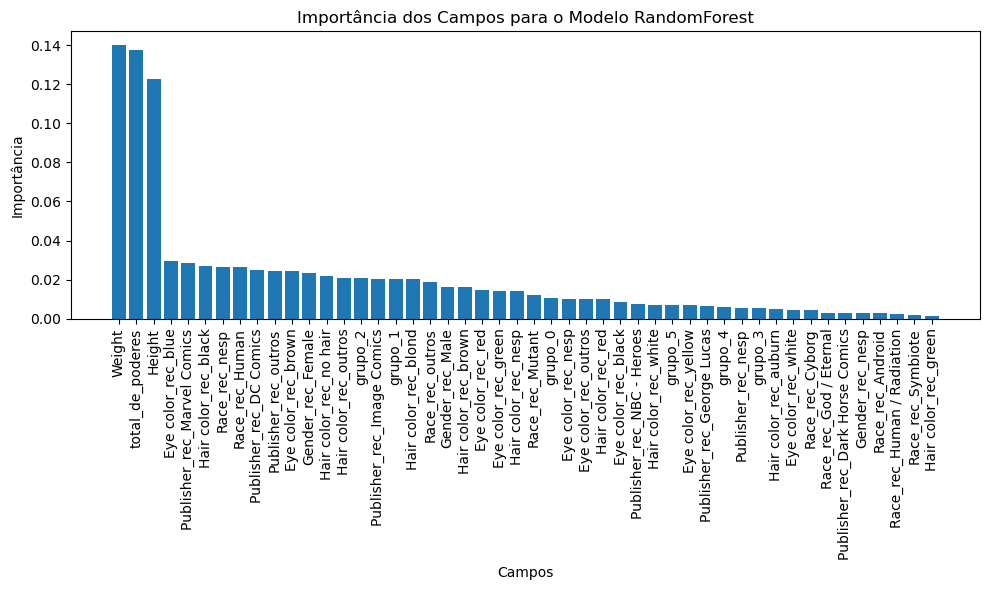

In [61]:
# Obtém a importância dos campos
feature_importances = rf_model.feature_importances_

# Cria um DataFrame com a importância dos campos e os nomes das colunas
feature_importances_df = pd.DataFrame({'Feature': X_train_balanced.columns, 'Importance': feature_importances})

# Ordena os campos por importância
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Campos')
plt.ylabel('Importância')
plt.title('Importância dos Campos para o Modelo RandomForest')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar cortes nos rótulos
plt.show()

### Peso, Altura e o Total de Poderes parecem ter a maior importância no modelo

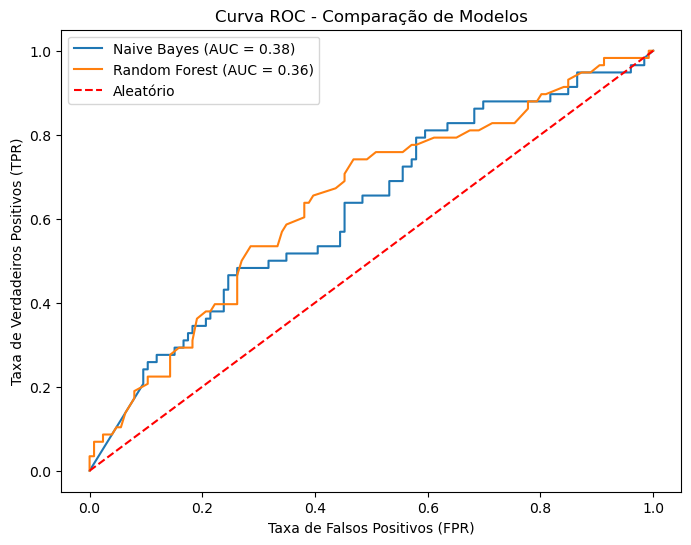

In [46]:
#Vamos comparar usando uma curva ROC
# Obtendo as probabilidades previstas para a classe 0 (ou 1, dependendo da sua necessidade)
# Para a classe 0, usamos `predict_proba` e selecionamos a primeira coluna (classe 0)
y_probs_nb = nb_model.predict_proba(X_test)[:, 0]  # Probabilidades para a classe 0
y_probs_rf = rf_model.predict_proba(X_test)[:, 0]  # Probabilidades para a classe 0

# Calculando a curva ROC e a AUC para Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb, pos_label=0)  # pos_label=0 para classe 0
auc_nb = roc_auc_score(y_test, y_probs_nb)

# Calculando a curva ROC e a AUC para Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf, pos_label=0)  # pos_label=0 para classe 0
auc_rf = roc_auc_score(y_test, y_probs_rf)

# Plotando as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Aleatório")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Comparação de Modelos")
plt.legend()
plt.show()

### Visivelmente o RF teve um melhor desempenho, embora a área dos dois seja semelhante. Pelo resultado do relatório de classficação, nós continuamos com o RF

# Questão 5 - Além do bem e mal - Modelo para o Peso

In [47]:
# Vamos pegar o banco num estado anterior (nós criamos anteriormente)
#h_completo_q5.head()
print(h_completo_q5.dtypes.to_string())

name                             object
Gender                           object
Eye color                        object
Race                             object
Hair color                       object
Height                          float64
Publisher                        object
Skin color                       object
Alignment                        object
Weight                          float64
Gender_rec                       object
Eye color_rec                    object
Race_rec                         object
Hair color_rec                   object
Publisher_rec                    object
Original_Weight                 float64
hero_names                       object
Agility                            bool
Accelerated Healing                bool
Lantern Power Ring                 bool
Dimensional Awareness              bool
Cold Resistance                    bool
Durability                         bool
Stealth                            bool
Energy Absorption                  bool


In [48]:
# Vamos remover os ausentes no campo peso original (para o modelo anterior, nós imputamos esse valor)
print(h_completo_q5.info())
h_completo_q5.dropna(subset=['Original_Weight'], inplace=True)

# Verificando o resultado
print(h_completo_q5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Columns: 186 entries, name to total_de_poderes
dtypes: bool(167), float64(3), int64(1), object(15)
memory usage: 200.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 642
Columns: 186 entries, name to total_de_poderes
dtypes: bool(167), float64(3), int64(1), object(15)
memory usage: 146.9+ KB
None


In [51]:
# Conferindo. Sem valores ausentes

for col in h_completo_q5.columns:
    missing_count = h_completo_q5[col].isna().sum()
    print(f"{col}: {missing_count} valores missing")

name: 0 valores missing
Gender: 0 valores missing
Eye color: 0 valores missing
Race: 0 valores missing
Hair color: 0 valores missing
Height: 0 valores missing
Publisher: 0 valores missing
Skin color: 0 valores missing
Alignment: 0 valores missing
Weight: 0 valores missing
Gender_rec: 0 valores missing
Eye color_rec: 0 valores missing
Race_rec: 0 valores missing
Hair color_rec: 0 valores missing
Publisher_rec: 0 valores missing
Original_Weight: 0 valores missing
hero_names: 0 valores missing
Agility: 0 valores missing
Accelerated Healing: 0 valores missing
Lantern Power Ring: 0 valores missing
Dimensional Awareness: 0 valores missing
Cold Resistance: 0 valores missing
Durability: 0 valores missing
Stealth: 0 valores missing
Energy Absorption: 0 valores missing
Flight: 0 valores missing
Danger Sense: 0 valores missing
Underwater breathing: 0 valores missing
Marksmanship: 0 valores missing
Weapons Master: 0 valores missing
Power Augmentation: 0 valores missing
Animal Attributes: 0 valores

In [52]:
# Só relembrando que agora estamos considerando alinhamento neutro e ausente

h_completo_q5['Alignment'].value_counts(normalize=True) * 100 

Alignment
good       66.304348
bad        29.347826
neutral     3.695652
nesp        0.652174
Name: proportion, dtype: float64

In [53]:
#Definindo X e y

X_peso = h_completo_q5[['Gender_rec', 'Race_rec', 'Height',  'total_de_poderes', 'grupo']]
y_peso = h_completo_q5['Original_Weight']

In [54]:
# Recodificando as variáveis categóricas com one-hot. Mesmo processo do modelo anterior

X_p_rec = pd.get_dummies(X_peso, drop_first=True)

X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p_rec, y_peso, test_size=0.3, random_state=42)

# Nós testamos um seletor de campos para o modelo
#rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)

#selector = SelectFromModel(rf_selector, threshold='median')  # threshold pode ser ajustado
#selector.fit(X_p_train, y_p_train)

#selected_feature_names = X_p_train.columns[selector.get_support()]

#print("Features Selecionadas:", selected_feature_names.tolist())

#X_p_train_selected = selector.transform(X_p_train)
#X_p_test_selected = selector.transform(X_p_test)


# Criando o modelo Random Forest Regressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_p_train, y_p_train)
y_p_pred = rf_regressor.predict(X_p_test)

In [55]:
# Esse modelo será usado no relatório do Streamlit e por isso estamos salvando

with open('C:/Dados/Alelo/modelo_peso.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)

In [56]:
#print(X_p_rec.dtypes.to_string())
# essa linha ajudou na hora de construir a interface do streamlit

Height                        float64
total_de_poderes                int64
Gender_rec_Male                  bool
Gender_rec_nesp                  bool
Race_rec_Cyborg                  bool
Race_rec_God / Eternal           bool
Race_rec_Human                   bool
Race_rec_Human / Radiation       bool
Race_rec_Mutant                  bool
Race_rec_Symbiote                bool
Race_rec_nesp                    bool
Race_rec_outros                  bool
grupo_1                          bool
grupo_2                          bool
grupo_3                          bool
grupo_4                          bool
grupo_5                          bool


In [57]:
# Calculando métricas de avaliação
mae = mean_absolute_error(y_p_test, y_p_pred)
mse = mean_squared_error(y_p_test, y_p_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_p_test, y_p_pred)

print("Métricas de Avaliação:")
print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
print(f"MSE (Erro Quadrático Médio): {mse:.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

Métricas de Avaliação:
MAE (Erro Absoluto Médio): 45.85
MSE (Erro Quadrático Médio): 7797.11
RMSE (Raiz do Erro Quadrático Médio): 88.30
R² (Coeficiente de Determinação): 0.09


#### Um R2 de 0.1, não é muito promissor 

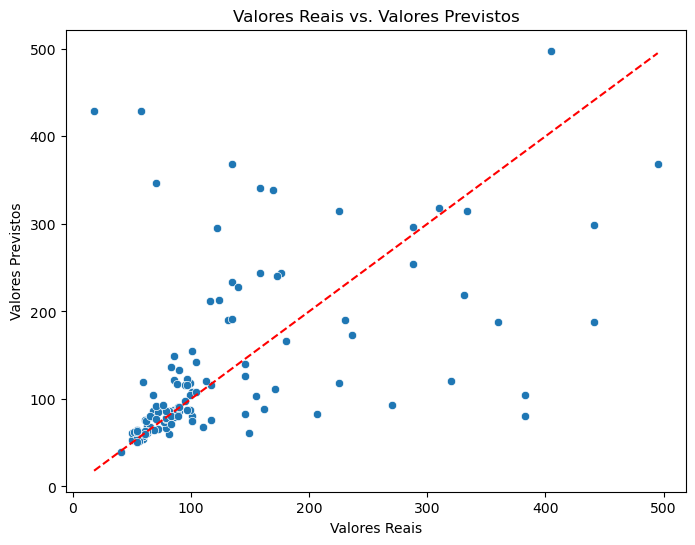

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_p_test, y=y_p_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos')
plt.plot([y_p_test.min(), y_p_test.max()], [y_p_test.min(), y_p_test.max()], color='red', linestyle='--')  # Linha de referência
plt.show()

### Nosso modelo parece ter problemas para os pesos maiores!!

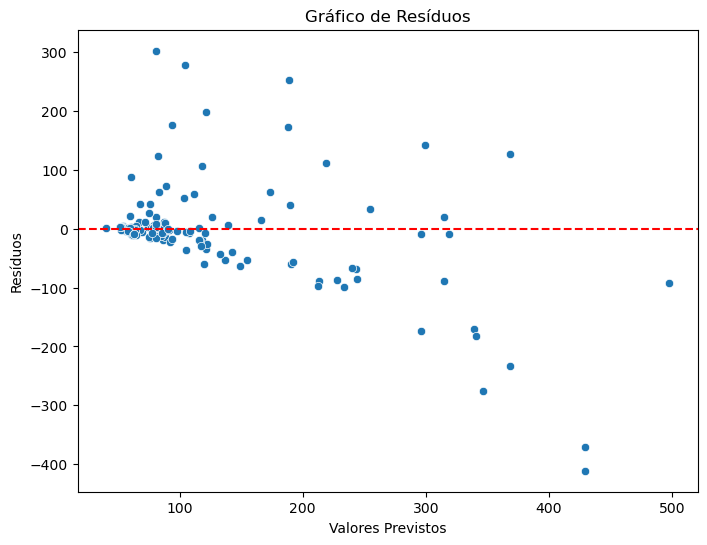

In [59]:
# Gráfico de resíduos
residuos = y_p_test - y_p_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_p_pred, y=residuos)
plt.axhline(y=0, color='red', linestyle='--')  # Linha de referência
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

### A mesma coisa no gráfico dos resíduos

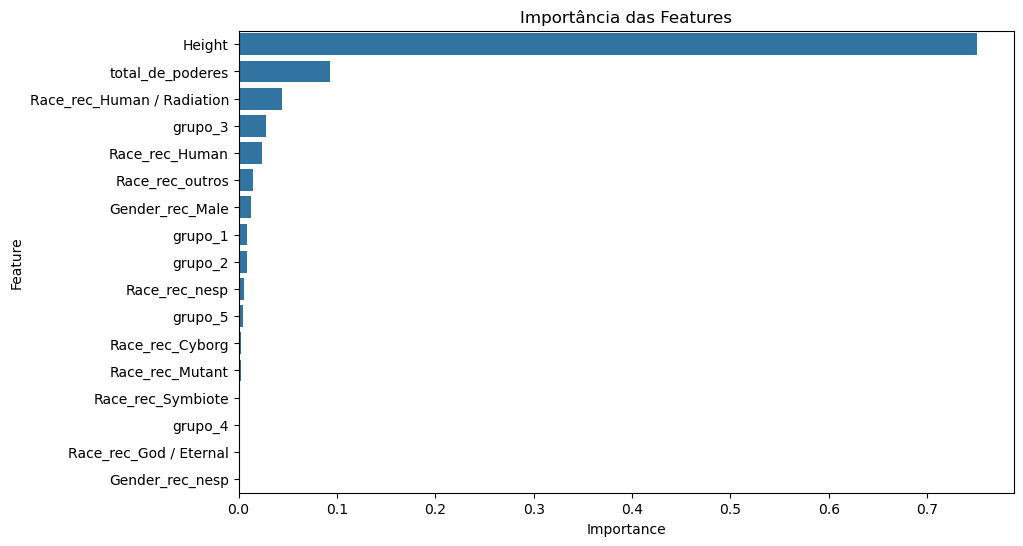

In [60]:
# Importância das features
importancias = rf_regressor.feature_importances_
feature_names = X_p_rec.columns
importancias_df = pd.DataFrame({'Feature': feature_names, 'Importance': importancias})
importancias_df = importancias_df.sort_values(by='Importance', ascending=False)

# Gráfico de importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importancias_df)
plt.title('Importância das Features')
plt.show()

### Como esperado, a altura acabou tendo uma grande importância e parece dominar o modelo